<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

# Dataset Overview

This notebook provides methods to rapidly get an overview of all variables in a dataset

**Table of contents**
    
- **<a href="#dataset_overview">Simple dataset overview</a>**
- **<a href="#detailed_dataset_overview">Detailed dataset overview</a>**
	- <a href="#numerical_variable_check">Numerical variable checks</a>
        - <a href="#numerical_variable_correlations">Numerical variable correlations</a>
	- <a href="#non_numerical_variable_check">Non-numerical variable checks</a>
	- <a href="#missing_value_check">Missing value checks</a>
		- <a href="#missing_histogram">Histogram of missings per row</a>
		- <a href="#missing_lineplot">Line plot of missings per row</a>
		- <a href="#missing_boxplot">Box plot of missings per row</a>
        - <a href="#missing_correlations">Correlation of missing values across variables</a>

This notebook primarily uses capabilities from numpy and pandas. 

**We begin by importing key libraries**

In [2]:
# Import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Optional import of OW color scheme**

In [3]:
# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'utilities' to the path from which we can import modules  
import sys
sys.path.append('../../utilities')
from resources.ow_colormap import ow_colormap 

**Load in data from CSV**

We read in the data from a CSV containing data about passengers on the Titanic

In [4]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
dataset = pd.read_csv("sample_input/titanic.csv", low_memory=False)

<a id="dataset_overview"></a>
# Simple dataset overview using native pandas methods

We use the following pandas methods to obtain basic information about the contents of the data:
* .info(): Column names, number of non-nulls, and column data type
* .head(): See top rows of each data field
* .describe(): Basic stats for each variable, which we then augment with number of missing or blank values

Following this we use a custom function for additional information from numerical and categorical variables respectively.

-------------------------------------------------------------------------------------------------------------------------------
**.info() method provides information on the following:**
- Number of rows and columns
- Column names
- Number of non-missing values per column
- Column type (e.g. integer, float, object such as string, datetime)
- Number of variables by data type
- Memory usage

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-------------------------------------------------------------------------------------------------------------------------------
**.head(N) method shows the first N rows of the dataset**

In [6]:
pd.set_option('display.max_columns', None) # Show all columns (when there is a large number of columns, only the first and last several columns are shown)
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


-------------------------------------------------------------------------------------------------------------------------------
**.describe() method provides additional information about each column, with different types of information based on data type**

In [7]:
dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**You can choose to describe columns of specific data types, and also specify percentiles for numerical variables** 
Read more here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

<a id="detailed_dataset_overview"></a>
# Detailed dataset overview

We have created the following functions (stored in the utilities\data_exploration\dataset_overview.py file). We import the functions from this file:

In [8]:
import sys
sys.path.append('../../utilities')
from data_exploration import dataset_overview

<a id="numerical_variable_check"></a>
## Numerical variable check

Overview of each field

In [9]:
numerical_summary = dataset_overview.get_numerical_info(dataset)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
data type,int64,int64,int64,float64,int64,int64,float64
count,891,891,891,714,891,891,891
# non-missing,891,891,891,714,891,891,891
# missing,0,0,0,177,0,0,0
# of 0s,0,549,0,0,608,678,15
# unique values,891,2,3,88,7,7,248
sum,397386.0,342.0,2057.0,21205.17,466.0,340.0,28693.9493
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
standard deviation,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
skewness,0.0,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317


<a id="numerical_variable_correlations"></a>
### Numerical variable correlations

Matrix of correlations between each variable. For detecting more advanced relationships, such as through variable clustering, see separate templates for Unsupervised Learning.

The following returns a correlation matrix, with heatmap chart. We have asked the heatmap chart to use a colormap based on OW colors (which is optional)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


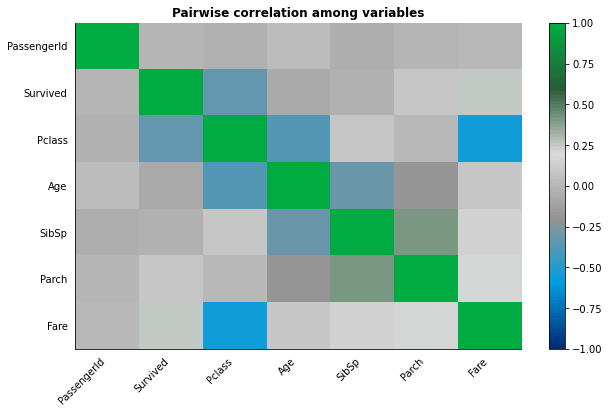

In [44]:
num_corr_fig, num_corr_table = dataset_overview.numerical_correlation(dataset, cmap=ow_colormap())
num_corr_table

<a id="non_numerical_variable_check"></a>
## Non-numerical variable check


In [11]:
non_numerical_summary = dataset_overview.get_non_numerical_info(dataset)

,Name,Sex,Ticket,Cabin,Embarked
data type,object,object,object,object,object
count,891,891,891,204,889
# non-missing,891,891,891,204,889
# missing,0,0,0,687,2
# of blanks,0,0,0,0,0
# unique values,891,2,681,147,3
most frequent,"Abbing, Mr. Anthony",male,1601,B96 B98,S
average length,26.965208,4.704826,6.750842,3.13468,1.004489
potentially numeric,No,No,No,No,No
potentially datetime,No,No,No,No,No


----------------------------------
<a id="missing_value_check"></a>

## Missing values check

This looks at distributions of missing values in the dataset:
- Histogram of missing values
- Line plot of missing values over the sorted values of a variable (e.g. time or index)
- Box and whisker plot of missing values by bucket of a variable

Also: Correlation in missing value patterns across variables.

### Histogram of missing values <a id="missing_histogram"></a>

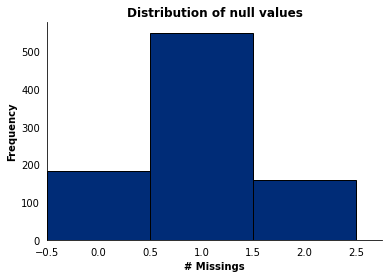

In [22]:
missing_hist, histogram_info = dataset_overview.null_histogram(dataset, figsize=(6,4), blanks_as_null=False)

### Line plot of missing values over another variable or index <a id="missing_lineplot"></a>

**We start with plotting the number of missing values by row index**

,dimension,mean,median,std,min,max,_q25,_q75
0,0,1.0,1.0,0.0,1,1,1.0,1.0
1,1,0.0,0.0,0.0,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1,1,1.0,1.0
3,3,0.0,0.0,0.0,0,0,0.0,0.0
4,4,1.0,1.0,0.0,1,1,1.0,1.0
...,...,...,...,...,...,...,...,...
886,886,1.0,1.0,0.0,1,1,1.0,1.0
887,887,0.0,0.0,0.0,0,0,0.0,0.0
888,888,2.0,2.0,0.0,2,2,2.0,2.0
889,889,0.0,0.0,0.0,0,0,0.0,0.0


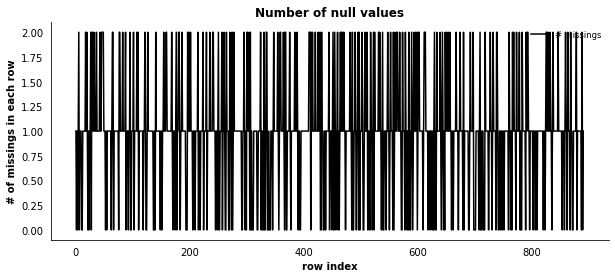

In [13]:
missing_chart, missing_info = dataset_overview.null_line_chart(dataset, figsize=(10,4))
missing_info

,dimension,mean,median,std,min,max,_q25,_q75
0,C,0.815476,1.0,0.747370,0,2,0.0,1.0
1,Q,1.584416,2.0,0.546536,0,2,1.0,2.0
2,S,0.939441,1.0,0.544502,0,2,1.0,1.0


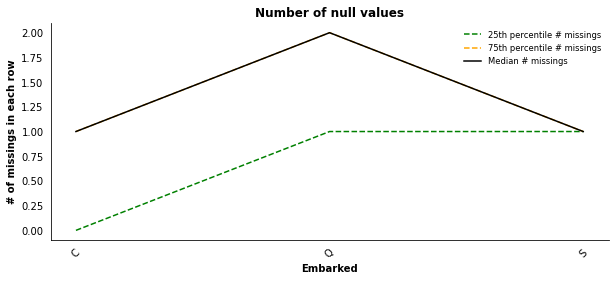

In [14]:
missing_chart, missing_info = dataset_overview.null_line_chart(dataset, dimension="Embarked", figsize=(10,4))
missing_info

### Box and Whiskers plot of missing values over a numeric variable or index <a id="missing_boxplot"></a>

This plot is similar to the above, but bins the data by ranges of a numerical variable (instead of keeping every value separate)

bins  missings                                   
                         mean       std median min _q25 _q75 max
0   (0.419, 16.336]  0.840000  0.368453    1.0   0  1.0  1.0   1
1  (16.336, 32.252]  0.823699  0.381628    1.0   0  1.0  1.0   1
2  (32.252, 48.168]  0.654255  0.476880    1.0   0  0.0  1.0   1
3  (48.168, 64.084]  0.478261  0.503187    0.0   0  0.0  1.0   1
4    (64.084, 80.0]  0.545455  0.522233    1.0   0  0.0  1.0   1

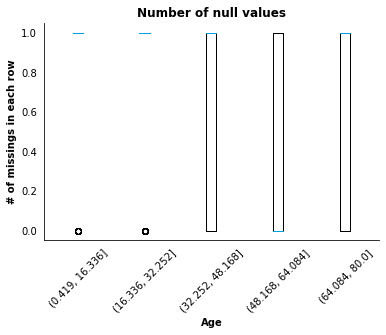

In [15]:
missing_chart, missing_info = dataset_overview.null_by_bin_chart(dataset, dimension="Age", grouping="Equal Width", 
                                                                 num_groups = 5, figsize=(10,4))
missing_info

### Correlations in missing values across variables  <a id="missing_correlations"></a>

Blank / NaN pairwise correlation indicate that one or both variables are all non-missing or are all missing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.144111,-0.023616
SibSp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


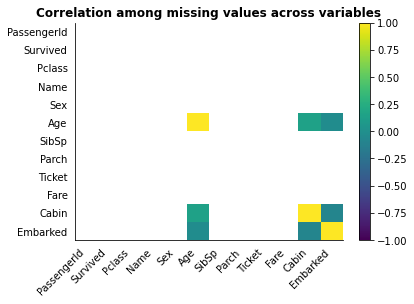

In [48]:
missing_corr, missing_corr_table = dataset_overview.missing_value_correlation(dataset, figsize=(6,4))
missing_corr_table